<a href="https://colab.research.google.com/github/marcos626/control_systems_Ogata/blob/master/03_Blocks_Stability_Feedback_impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Block Diagrams, Stability and Feedback

### author: Juan Manuel Acevedo Valle
### date: 10/12/2018

In [ ]:
%matplotlib inline

# Import libraries we will be using in this session
import control
from control import ss, tf, series, feedback
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0,6.0)
matplotlib.rcParams.update({'font.size': 12, 'font.weight': 'bold'})

In [ ]:
# series, parallel, feedback
K = -1
K_h = 1.
tf_K = tf([K],[1.])
tf_K_h = tf([K_h],[1.])
tf_11 = tf([20.],[1.,1.])
tf_12 = tf([1.],[1.,4.])
tf_2 = tf([1.],[1.,0])

tf_total = feedback(series(feedback(series(series(tf_K,tf_11),tf_12),tf_K_h),tf_2),1)
print(tf_total)


          -20
-----------------------
s^3 + 5 s^2 - 16 s - 20



In [ ]:
# Determine stability
print(control.pole(tf_total))


P = tf_total.den[0][0]
print(np.roots(P))

[-6.89897949  2.89897949 -1.        ]
[-6.89897949  2.89897949 -1.        ]


In [ ]:
# Stability in from eigenvalues
ss = control.tf2ss(tf_total)
print(ss)
print(np.linalg.eigvals(ss.A))

A = [[ -5.   -1.6   2. ]
 [-10.    0.    0. ]
 [  0.   -1.    0. ]]

B = [[-1.]
 [ 0.]
 [ 0.]]

C = [[0. 0. 2.]]

D = [[0.]]

[-6.89897949  2.89897949 -1.        ]


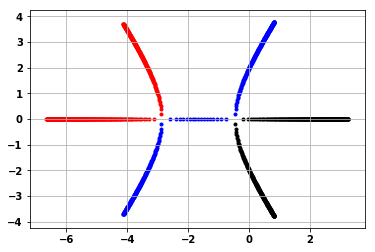

In [ ]:
# The location of the routs of a system depends on the closedloop gain
# series, parallel, feedback
K = np.linspace(-5.,5.,500)
K_h = [0.001] #np.linspace(0.,5.,50)
for k in K:
    for k_h in K_h:
        tf_K = tf([k],[1.])
        tf_K_h = tf([k_h],[1.])
        tf_11 = tf([20.],[1.,1.])
        tf_12 = tf([1.],[1.,4.])
        tf_2 = tf([1.],[1.,0])
        tf_total = feedback(series(feedback(series(series(tf_K,tf_11),tf_12),tf_K_h),tf_2),1)
        poles = control.pole(tf_total)
        for pole, point in zip(poles,['r','b','k']):
            plt.scatter(np.real(pole),np.imag(pole),color=point,marker='.')
        plt.grid(True)

In [ ]:
from ipywidgets import *

visited_x=[]
visited_y=[]
def f(K,K_h):
    global visited_x
    global visited_y
    tf_K = tf([K],[1.])
    tf_K_h = tf([K_h],[1.])
    tf_11 = tf([20.],[1.,1.])
    tf_12 = tf([1.],[1.,4.])
    tf_2 = tf([1.],[1.,0])
    tf_total = feedback(series(feedback(series(series(tf_K,tf_11),tf_12),tf_K_h),tf_2),1)
    poles = control.pole(tf_total)
    visited_x += list(np.real(poles))
    visited_y += list(np.imag(poles))
    plt.plot(visited_x,visited_y,'.')
    try:
        if np.any(np.real(poles)>0):
            plt.plot(visited_x[-3:],visited_y[-3:],'xr',ms=10.0, mew=6.0)
        else:
            plt.plot(visited_x[-3:],visited_y[-3:],'xg',ms=10.0, mew=6.0)
    except:
        plt.plot(visited_x,visited_y,'xb')
    plt.xlabel("Real $Re$")
    plt.ylabel("Imag $Im$")
    plt.xlim([-20.,20.])
    plt.ylim([-60.,60.])
    plt.grid(True)
    plt.title("Root locus")
#     print(poles)
    for pole in poles:
        plt.text(np.real(pole) - 0,np.imag(pole) - 4, str(round(np.real(pole),2)), fontsize = 12, horizontalalignment='center', verticalalignment='center')
    plt.show()

interactive_plot = interactive(f, K=(-3.,3.,0.02), K_h=(0.,5.,0.02))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMCwgZGVzY3JpcHRpb249dSdLJywgbWF4PTMuMCwgbWluPS0zLjAsIHN0ZXA9MC4wMiksIEZsb2F0U2xpZGVyKHZhbHXigKY=
